# FINM 33150 Homework 4: Accumulation Opportunities

Sean Lin

Student ID: 12375235

***

## 1 Introduction

In this assignment, we look at accumulation opportunities in various cryptocurrency pairs across three different time periods (2021, 2022, and 2023). We examine the trade book before simulating accumulation of either long or short positions. We examine the ability to accumulate large positions in these cryptocurrency pairs.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings 
import random 

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.5f}'.format

## 2 Data

In this assignment, we are dealing with three different pairs: BTC/USD, ETH/USD, and ETH/BTC. The data comes in the form of high-frequency data on the order of nanoseconds during periods spannig a few days in 2021, 2022, 2023. We will load and look at this data before looking at any accumulation attempts.

***

**2.1 Helper Functions**

First, we will define helper functions that will assist in downloading our high-frequency datasets. In particular, `read_data` will extract the high-frequency data for a pair during a specific year. Documentation can be found in the function below.



In [2]:
def read_data(pair,year,prefix='trades_narrow_'):
    '''
    Reads cryptocurrency trade data and outputs in a readable format 

    Parameters:
        pair (string): The pair corresponding to order book 
        year (int): The year corresponding to the order book 
        prefix (string): The prefix of the filename (default trades_narrow_)

    Returns:
        data (DataFrame): DataFrame consisting of trade data for cryptocurrency 
    '''
    filename = prefix + pair + '_' + str(year) + '.delim'
    data = pd.read_table(filename).drop(columns=['received_utc_nanoseconds']) 
    data['PriceMillionths'] = data['PriceMillionths'] / 1_000_000 # Price in more understandable format
    data['SizeBillionths'] = data['SizeBillionths'] / 1_000_000_000 # Size in more understandable format 
    data['timestamp_utc_nanoseconds'] = pd.to_datetime(data['timestamp_utc_nanoseconds']) # Converts UTC to real date 
    data.index.name = pair 
    return data 

In [3]:
BTC_USD_2021 = read_data('BTC-USD',2021)
BTC_USD_2022 = read_data('BTC-USD',2022)
BTC_USD_2023 = read_data('BTC-USD',2023)

ETH_USD_2021 = read_data('ETH-USD',2021)
ETH_USD_2022 = read_data('ETH-USD',2022)
ETH_USD_2023 = read_data('ETH-USD',2023)

ETH_BTC_2021 = read_data('ETH-BTC',2021)
ETH_BTC_2022 = read_data('ETH-BTC',2022)
ETH_BTC_2023 = read_data('ETH-BTC',2023)

***

**2.2 Analyzing Trade Data**

The first thing to do after obtaining data is to actually look at it and examine what you're dealing with. Since we're trying to determine our ability to accumulate positions, the price is less important considering we're also dealing with different pairs: relationships between price and volume are much more important than strictly price. First, we will look at how much time we're dealing with for each pair and year.



In [4]:
data_length = pd.DataFrame(columns=['BTC/USD 21','ETH/USD 21','ETH/BTC 21','BTC/USD 22','ETH/USD 22','ETH/BTC 22','BTC/USD 23','ETH/USD 23','ETH/BTC 23'],index=['Start','End','Time'])
data_length.loc[['Start','End'],'BTC/USD 21'] = [BTC_USD_2021.iloc[0]['timestamp_utc_nanoseconds'], BTC_USD_2021.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'BTC/USD 22'] = [BTC_USD_2022.iloc[0]['timestamp_utc_nanoseconds'], BTC_USD_2022.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'BTC/USD 23'] = [BTC_USD_2023.iloc[0]['timestamp_utc_nanoseconds'], BTC_USD_2023.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/USD 21'] = [ETH_USD_2021.iloc[0]['timestamp_utc_nanoseconds'], ETH_USD_2021.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/USD 22'] = [ETH_USD_2022.iloc[0]['timestamp_utc_nanoseconds'], ETH_USD_2022.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/USD 23'] = [ETH_USD_2023.iloc[0]['timestamp_utc_nanoseconds'], ETH_USD_2023.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/BTC 21'] = [ETH_BTC_2021.iloc[0]['timestamp_utc_nanoseconds'], ETH_BTC_2021.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/BTC 22'] = [ETH_BTC_2022.iloc[0]['timestamp_utc_nanoseconds'], ETH_BTC_2022.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc[['Start','End'],'ETH/BTC 23'] = [ETH_BTC_2023.iloc[0]['timestamp_utc_nanoseconds'], ETH_BTC_2023.iloc[-1]['timestamp_utc_nanoseconds']]
data_length.loc['Time'] = data_length.loc['End'] - data_length.loc['Start']

data_length

,BTC/USD 21,ETH/USD 21,ETH/BTC 21,BTC/USD 22,ETH/USD 22,ETH/BTC 22,BTC/USD 23,ETH/USD 23,ETH/BTC 23
Start,2021-04-10 21:28:52.515484,2021-04-10 21:28:54.547039,2021-04-10 21:28:57.157544,2022-01-29 21:02:49.574850,2022-01-29 21:02:52.762420,2022-01-29 21:02:56.287757,2023-01-24 00:47:47.874527,2023-01-24 00:47:51.071902,2023-01-24 00:49:06.020758
End,2021-04-27 00:22:17.851269,2021-04-13 03:38:43.977590,2021-04-12 23:36:56.105583,2022-02-05 01:29:55.223562,2022-02-05 01:29:55.456813,2022-02-05 01:29:47.860828,2023-01-25 15:50:01.601767,2023-01-25 15:00:30.376266,2023-01-25 15:08:05.145749
Time,16 days 02:53:25.335785,2 days 06:09:49.430551,2 days 02:07:58.948039,6 days 04:27:05.648712,6 days 04:27:02.694393,6 days 04:26:51.573071,1 days 15:02:13.727240,1 days 14:12:39.304364,1 days 14:18:59.124991


We see that for the most part, the periods of the data are about the same (i.e they cover the same periods). However, we see that the data from BTC/USD in 2021 covers a must longer timeframe than that of ETH/USD and ETH/BTC. More specifically, we see that our data for BTC/USD covers 16 days while ETH/USD and ETH/BTC only cover approximately 2 days. Since all comparisons are relative to something else, the timeframes of the data should be similar, otherwise you can't make comparisons as there is nothing to compare to. Here, we will modify our 2021 data so that our sample ends at the shortest time (2021-04-12 23:36:56). The other years are close enough such that we will keep them the same.

In [5]:
shortest_time = data_length.loc['End'].min()
BTC_USD_2021 = BTC_USD_2021[BTC_USD_2021['timestamp_utc_nanoseconds'] <= shortest_time]
ETH_USD_2021 = ETH_USD_2021[ETH_USD_2021['timestamp_utc_nanoseconds'] <= shortest_time]

Let's see how many total trades were completed in our modified samples.

In [6]:
n_trades = pd.DataFrame(columns=['BTC/USD 21','ETH/USD 21','ETH/BTC 21','BTC/USD 22','ETH/USD 22','ETH/BTC 22','BTC/USD 23','ETH/USD 23','ETH/BTC 23'],index=['Trades'])
n_trades['BTC/USD 21'] = len(BTC_USD_2021)
n_trades['ETH/USD 21'] = len(ETH_USD_2021)
n_trades['ETH/BTC 21'] = len(ETH_BTC_2021)
n_trades['BTC/USD 22'] = len(BTC_USD_2022)
n_trades['ETH/USD 22'] = len(ETH_USD_2022)
n_trades['ETH/BTC 22'] = len(ETH_BTC_2022)
n_trades['BTC/USD 23'] = len(BTC_USD_2023)
n_trades['ETH/USD 23'] = len(ETH_USD_2023)
n_trades['ETH/BTC 23'] = len(ETH_BTC_2023)

n_trades

,BTC/USD 21,ETH/USD 21,ETH/BTC 21,BTC/USD 22,ETH/USD 22,ETH/BTC 22,BTC/USD 23,ETH/USD 23,ETH/BTC 23
Trades,415673,278705,32744,2907376,2711795,116525,560107,377185,1958


We can see that BTC/USD always has the most amount of trades being completed, followed by ETH/USD, and then ETH/BTC in every time period (approximately). This makes sense as BTC is the most popular cryptocurrency; it would make sense that it has the most amount of trades. Comparing the trades across time periods is more difficult here as the time-periods are over different intervals (2 days vs 6 days vs 1 day).

Now, let's examine the traded size of the pairs for each year during the given time interval. We will do this by plotting the volume vs. the date on a scatter plot. The scatter plot is chosen as multiple trades could occur at the same time or no trades could occur at some time. There is no reason to make this a continuous plot. We will also normalize the y-axis to the maximum size in a trade. The amount of cryptocurrency is arbitrary here. We will also show the different sides of the trades here. **Red corresponds to sells and Blue corresponds to buys.**

Text(0.5, 0, 'Date')

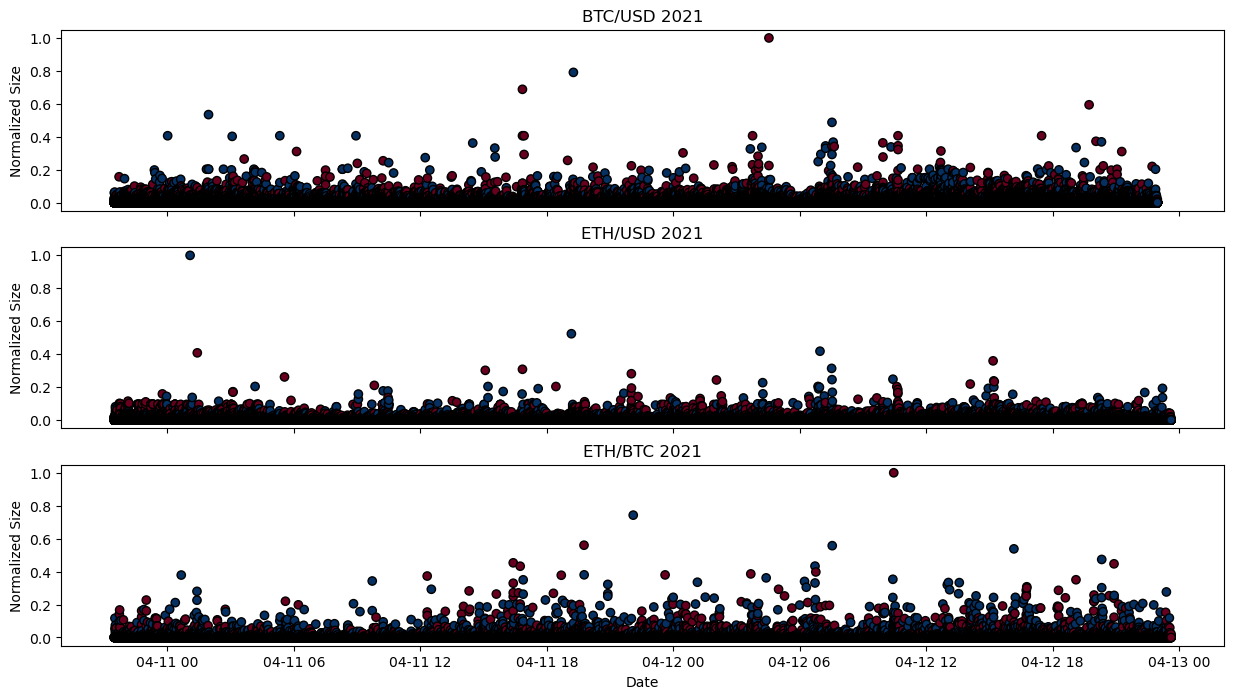

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.scatter(BTC_USD_2021['timestamp_utc_nanoseconds'],BTC_USD_2021['SizeBillionths']/BTC_USD_2021['SizeBillionths'].max(),c=np.sign(BTC_USD_2021['Side']),cmap='RdBu',edgecolor='k')
ax1.set_title('BTC/USD 2021')
ax1.set_ylabel('Normalized Size')

ax2.scatter(ETH_USD_2021['timestamp_utc_nanoseconds'],ETH_USD_2021['SizeBillionths']/ETH_USD_2021['SizeBillionths'].max(),c=np.sign(ETH_USD_2021['Side']),cmap='RdBu',edgecolor='k')
ax2.set_title('ETH/USD 2021')
ax2.set_ylabel('Normalized Size')

ax3.scatter(ETH_BTC_2021['timestamp_utc_nanoseconds'],ETH_BTC_2021['SizeBillionths']/ETH_BTC_2021['SizeBillionths'].max(),c=np.sign(ETH_BTC_2021['Side']),cmap='RdBu',edgecolor='k')
ax3.set_title('ETH/BTC 2021')
ax3.set_ylabel('Normalized Size')
ax3.set_xlabel('Date')


For the 2021 shared time period, we see that many of the trade sizes are within 20% of the maximum size for all the pairs. We also see large peaks in traded volumes. However, these peaks don't appear to be strongly correlated across the different pairs, though there are moments where we see peaks in all pairs (i.e right after 04-12 06).

Text(0.5, 0, 'Date')

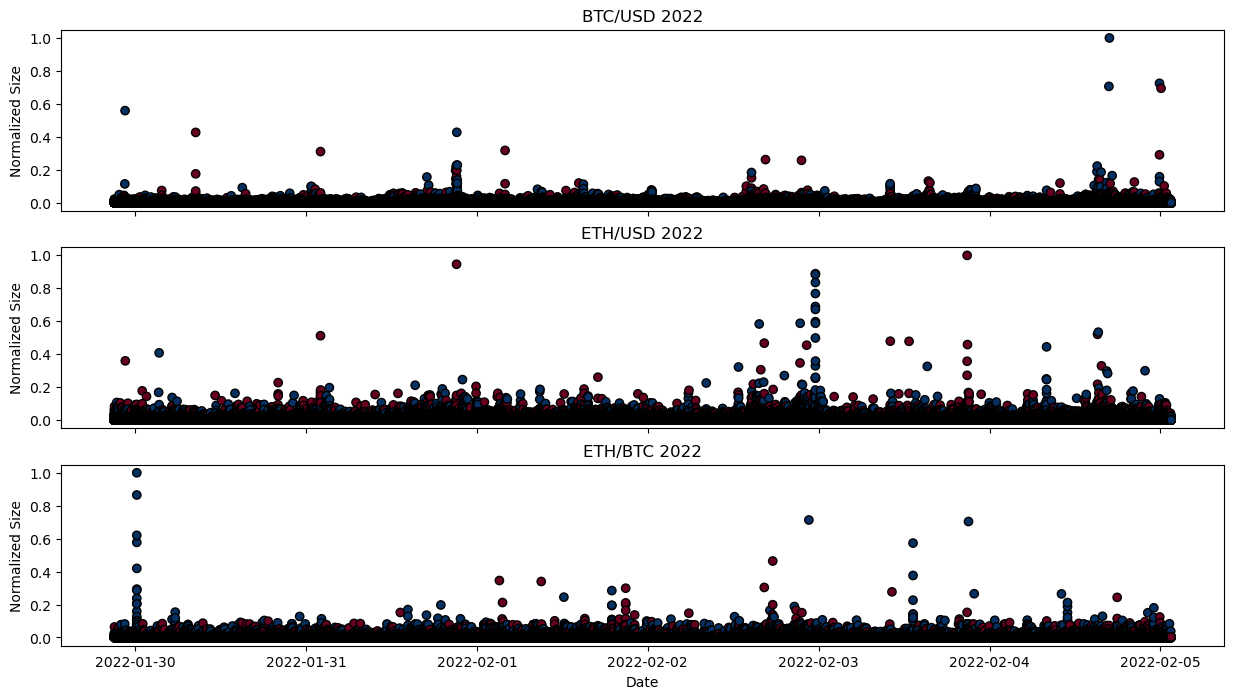

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.scatter(BTC_USD_2022['timestamp_utc_nanoseconds'],BTC_USD_2022['SizeBillionths']/BTC_USD_2022['SizeBillionths'].max(),c=np.sign(BTC_USD_2022['Side']),cmap='RdBu',edgecolor='k')
ax1.set_title('BTC/USD 2022')
ax1.set_ylabel('Normalized Size')

ax2.scatter(ETH_USD_2022['timestamp_utc_nanoseconds'],ETH_USD_2022['SizeBillionths']/ETH_USD_2022['SizeBillionths'].max(),c=np.sign(ETH_USD_2022['Side']),cmap='RdBu',edgecolor='k')
ax2.set_title('ETH/USD 2022')
ax2.set_ylabel('Normalized Size')

ax3.scatter(ETH_BTC_2022['timestamp_utc_nanoseconds'],ETH_BTC_2022['SizeBillionths']/ETH_BTC_2022['SizeBillionths'].max(),c=np.sign(ETH_BTC_2022['Side']),cmap='RdBu',edgecolor='k')
ax3.set_title('ETH/BTC 2022')
ax3.set_ylabel('Normalized Size')

ax3.set_xlabel('Date')

For the 2022 shared time period, we see something similar. For the most part, the normalized sizes are all less than 0.2. Similarly, the peaks don't appear to be very correlated across pairs, though there are moments where we see peaks in multiple pairs. For example, we see a peak in ETH/USD and ETH/BTC around 2022-02-03.

Text(0.5, 0, 'Date')

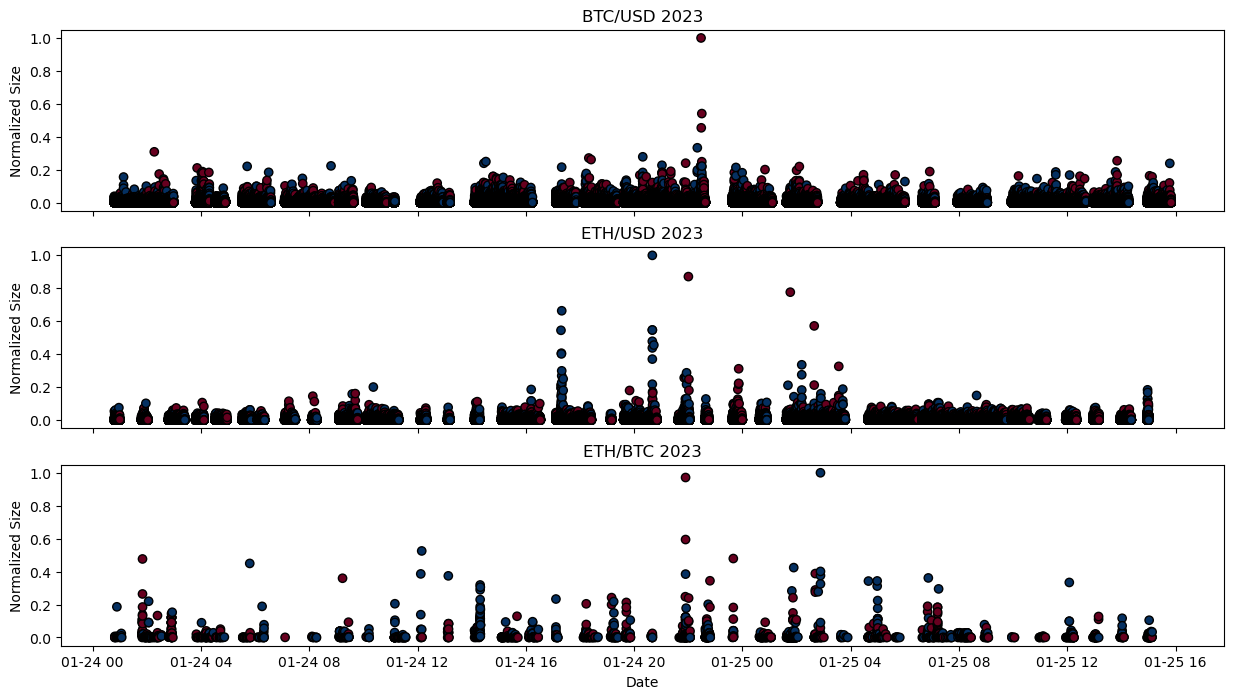

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.scatter(BTC_USD_2023['timestamp_utc_nanoseconds'],BTC_USD_2023['SizeBillionths']/BTC_USD_2023['SizeBillionths'].max(),c=np.sign(BTC_USD_2023['Side']),cmap='RdBu',edgecolor='k')
ax1.set_title('BTC/USD 2023')
ax1.set_ylabel('Normalized Size')

ax2.scatter(ETH_USD_2023['timestamp_utc_nanoseconds'],ETH_USD_2023['SizeBillionths']/ETH_USD_2023['SizeBillionths'].max(),c=np.sign(ETH_USD_2023['Side']),cmap='RdBu',edgecolor='k')
ax2.set_title('ETH/USD 2023')
ax2.set_ylabel('Normalized Size')

ax3.scatter(ETH_BTC_2023['timestamp_utc_nanoseconds'],ETH_BTC_2023['SizeBillionths']/ETH_BTC_2023['SizeBillionths'].max(),c=np.sign(ETH_BTC_2023['Side']),cmap='RdBu',edgecolor='k')
ax3.set_title('ETH/BTC 2023')
ax3.set_ylabel('Normalized Size')

ax3.set_xlabel('Date')

For the 2023 shared time period, we see something more interesting. We see gaps in the trades, something that we didn't really see in 2021 or 2022. Similarly to the other time periods, we see times when peaks in one pair are also in other pairs (right before 01-25 00). Here, we see this around 01-25 00. There are big peaks in normalized size for all the pairs. The gaps in the trades could be explained by the huge crash in cryptocurrency prices throughout 2023. A lot of excitement for cryptocurrency has turned into fear and as a result, activity in the cryptomarkets are low relative to the other years.

Now, let's see the proportion of buys and sells in each of these periods.

In [11]:
sides = pd.DataFrame(columns=['BTC/USD 21','ETH/USD 21','ETH/BTC 21','BTC/USD 22','ETH/USD 22','ETH/BTC 22','BTC/USD 23','ETH/USD 23','ETH/BTC 23'],index=['Buys','Sells'])
sides.loc['Buys','BTC/USD 21'] = len(BTC_USD_2021[np.sign(BTC_USD_2021['Side']) == 1]) / len(BTC_USD_2021)
sides.loc['Buys','BTC/USD 22'] = len(BTC_USD_2022[np.sign(BTC_USD_2022['Side']) == 1]) / len(BTC_USD_2022)
sides.loc['Buys','BTC/USD 23'] = len(BTC_USD_2023[np.sign(BTC_USD_2023['Side']) == 1]) / len(BTC_USD_2023)
sides.loc['Buys','ETH/USD 21'] = len(ETH_USD_2021[np.sign(ETH_USD_2021['Side']) == 1]) / len(ETH_USD_2021)
sides.loc['Buys','ETH/USD 22'] = len(ETH_USD_2022[np.sign(ETH_USD_2022['Side']) == 1]) / len(ETH_USD_2022)
sides.loc['Buys','ETH/USD 23'] = len(ETH_USD_2023[np.sign(ETH_USD_2022['Side']) == 1]) / len(ETH_USD_2023)
sides.loc['Buys','ETH/BTC 21'] = len(ETH_BTC_2021[np.sign(ETH_BTC_2021['Side']) == 1]) / len(ETH_BTC_2021)
sides.loc['Buys','ETH/BTC 22'] = len(ETH_BTC_2022[np.sign(ETH_BTC_2022['Side']) == 1]) / len(ETH_BTC_2022)
sides.loc['Buys','ETH/BTC 23'] = len(ETH_BTC_2023[np.sign(ETH_BTC_2023['Side']) == 1]) / len(ETH_BTC_2023)
sides.loc['Sells'] = 1 - sides.loc['Buys']

sides

,BTC/USD 21,ETH/USD 21,ETH/BTC 21,BTC/USD 22,ETH/USD 22,ETH/BTC 22,BTC/USD 23,ETH/USD 23,ETH/BTC 23
Buys,0.65712,0.67953,0.59886,0.61952,0.61993,0.57251,0.57784,0.63190,0.49591
Sells,0.34288,0.32047,0.40114,0.38048,0.38007,0.42749,0.42216,0.36810,0.50409


We see that the proportion of buys is highest for the BTC/USD 2021 subsample and the lowest for the ETH/BTC 2023 subsample. We also see that the proportion of buys is generally decreasing for each pair as time moves on. For example, BTC/USD has 65.71% buys in 2021, 61.95% buys in 2022, and then 57.78% buys in 2023. You could imagine that this does indeed make sense. In 2021 (and even 2022), there was a lot of excitement around cryptocurrencies. The sentiment around cryptocurrencies now is quite the opposite. You would expect there to be more sells due to the fact and you see this in the data. However, there should still be caution when making these conclusions as these samples are still quite small (and occur over very small time periods). It is still interesting to see this regardless.

Now, let's look at some descriptive statistics (mean, median, quantiles, etc.) of the pairs during this time to be a bit more quantitative. We will sort everything by the pair so that we can see if the trade sizes differ between the yearly samples.

In [12]:
btc_sizes = pd.concat([BTC_USD_2021['SizeBillionths'], BTC_USD_2022['SizeBillionths'], BTC_USD_2023['SizeBillionths']],axis=1)
btc_sizes.columns = ['BTC/USD 2021','BTC/USD 2022','BTC/USD 2023']

eth_sizes = pd.concat([ETH_USD_2021['SizeBillionths'], ETH_USD_2022['SizeBillionths'], ETH_USD_2023['SizeBillionths']], axis=1)
eth_sizes.columns = ['ETH/USD 2021','ETH/USD 2022','ETH/USD 2023']

eth_btc_sizes = pd.concat([ETH_BTC_2021['SizeBillionths'],ETH_BTC_2022['SizeBillionths'],ETH_BTC_2023['SizeBillionths']],axis=1)
eth_btc_sizes.columns = ['ETH/BTC 2021','ETH/BTC 2022','ETH/BTC 2023']

In [13]:
btc_sizes.describe()

,BTC/USD 2021,BTC/USD 2022,BTC/USD 2023
count,"415,673.00000","2,907,376.00000","560,107.00000"
mean,0.04631,0.03453,0.07165
std,0.21619,0.16660,0.18255
min,0.00000,0.00000,0.00000
25%,0.00094,0.00080,0.00212
50%,0.00391,0.00371,0.01227
75%,0.01702,0.01908,0.07417
max,24.61100,87.74578,27.44100


We see that our data is skewed. The mean is larger than the median in all our samples, indicating that our data is skewed by very large trade sizes. This makes sense as if we look at the maximum, we see a size of 88 BTC being completed in a single trade. However, the median is roughly the same between 2021 and 2022. However, it does increase to 0.01 in 2023. 

In [14]:
eth_sizes.describe()

,ETH/USD 2021,ETH/USD 2022,ETH/USD 2023
count,"278,705.00000","2,711,795.00000","377,185.00000"
mean,0.79795,0.46939,0.63458
std,3.27711,1.78652,2.18699
min,0.00000,0.00000,0.00000
25%,0.01178,0.00386,0.03082
50%,0.07024,0.04031,0.15735
75%,0.46137,0.32685,0.55473
max,489.88300,417.21940,340.36213


We see similar things in that our data is skewed. The median does appear to vary more here, with it going from 0.07 to 0.04 and then to 0.15 in 2023. We see that the min appears to be 0, but this can be explained by an extremely small size rather than the trade size actually being 0.

In [15]:
eth_btc_sizes.describe()

,ETH/BTC 2021,ETH/BTC 2022,ETH/BTC 2023
count,"32,744.00000","116,525.00000","1,958.00000"
mean,0.78962,0.56399,0.89515
std,3.26703,1.97024,2.36693
min,0.00002,0.00000,0.00000
25%,0.00897,0.00950,0.02000
50%,0.04533,0.07834,0.08417
75%,0.25505,0.48329,0.83896
max,136.45332,187.71900,37.58155


We see much of the same skewness as we saw with the previous pairs. However, the median remains roughly the same in 2022 / 2023 when compared to the previous pairs. The median does increase from our 2021 to 2022 sample though. We see that the trade count is much lower in ETH/BTC than in the Crypto/USD pairs. It is less common for people to convert directly from ETH to BTC rather than purchasing ETH and BTC with USD. Before moving onto our accumulation algorithm, let's look at the price of our pairs and VWAP.

***

**2.2 VWAP**

Let's first calculate the VWAP for our assets. We will define a helper function for this:

In [16]:
def calc_vwap(book):
    '''
    Calculates the VWAP for a trade book 

    Parameters:
        book (DataFrame): DataFrame consisting of the trade history (size, prices, sides)

    Returns:
        vwap (DataFrame): DataFrame consisting of the VWAP time series for the given tradebook 
    '''
    cum_vol = book['SizeBillionths'].cumsum()
    notional = (book['PriceMillionths'] * book['SizeBillionths']).cumsum()
    vwap = notional / cum_vol 
    vwap.index = book['timestamp_utc_nanoseconds']
    vwap = vwap[~vwap.index.duplicated(keep='last')] # There are times where multiple trades happen at the same time, so we will only keep the last one 
    return vwap.to_frame('VWAP')

Let's plot the price series and VWAP for all 3 pairs during all time periods. Let's start with the 2021 samples.

Text(0.5, 0, 'Date')

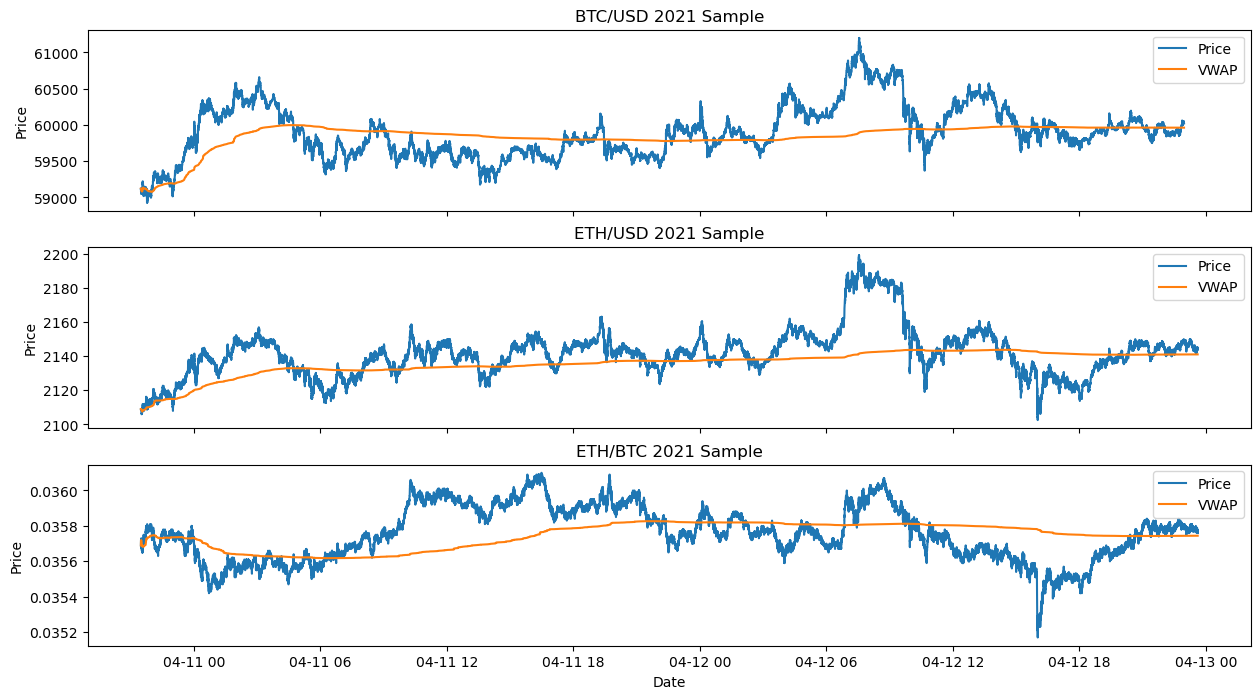

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.plot(BTC_USD_2021['timestamp_utc_nanoseconds'],BTC_USD_2021['PriceMillionths'],label='Price')
ax1.plot(calc_vwap(BTC_USD_2021),label='VWAP')
ax1.set_title('BTC/USD 2021 Sample')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(ETH_USD_2021['timestamp_utc_nanoseconds'],ETH_USD_2021['PriceMillionths'],label='Price')
ax2.plot(calc_vwap(ETH_USD_2021),label='VWAP')
ax2.set_title('ETH/USD 2021 Sample')
ax2.set_ylabel('Price')
ax2.legend()

ax3.plot(ETH_BTC_2021['timestamp_utc_nanoseconds'],ETH_BTC_2021['PriceMillionths'],label='Price')
ax3.plot(calc_vwap(ETH_BTC_2021),label='VWAP')
ax3.set_title('ETH/BTC 2021 Sample')
ax3.set_ylabel('Price')
ax3.legend()

ax3.set_xlabel('Date')

We see that all three pairs follow similar trends and are highly correlated. This makes sense as they are all the same asset class and will track each other closely. We will not quantitatively calculate the correlation here as this price series isn't an *exact* price series. There may be times where there are several prices at the same time, but due to the frequency, it is hard to identify it here. We also see the VWAP. The VWAP is more prone to changes early on in the sample while remains relatively steady later on in the sample. This makes sense as there needs to be a larger amount of volume for the average to change later on.

Text(0.5, 0, 'Date')

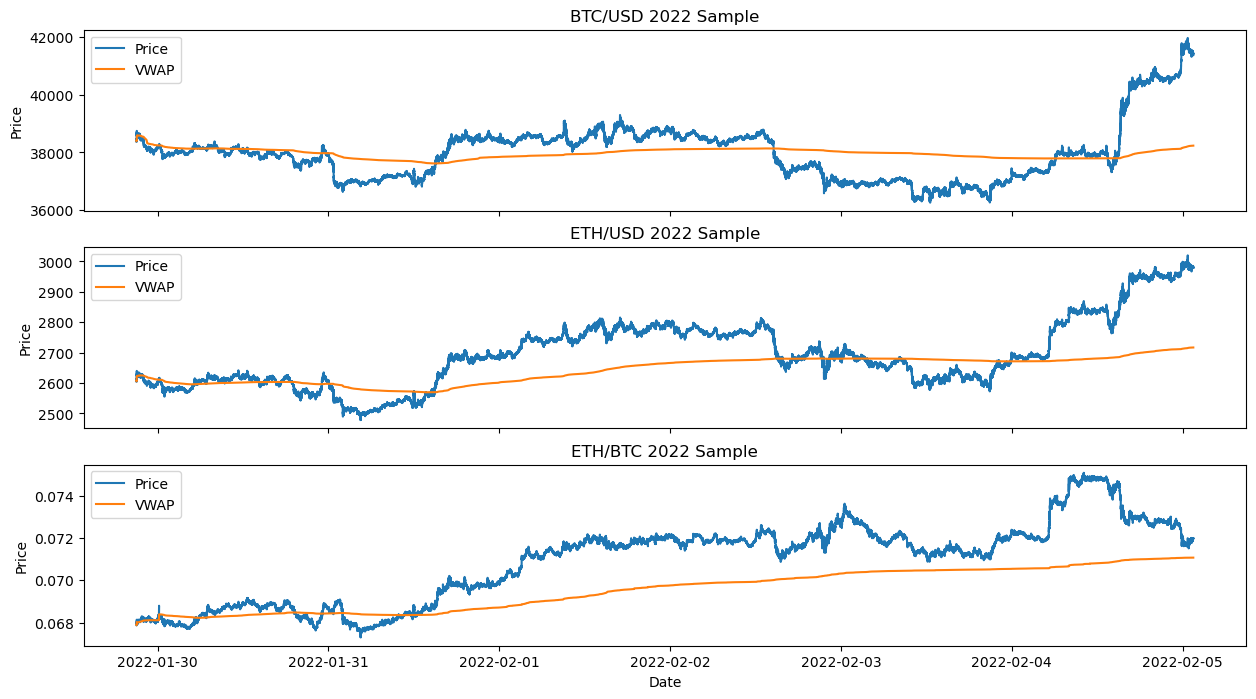

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.plot(BTC_USD_2022['timestamp_utc_nanoseconds'],BTC_USD_2022['PriceMillionths'],label='Price')
ax1.plot(calc_vwap(BTC_USD_2022),label='VWAP')
ax1.set_title('BTC/USD 2022 Sample')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(ETH_USD_2022['timestamp_utc_nanoseconds'],ETH_USD_2022['PriceMillionths'],label='Price')
ax2.plot(calc_vwap(ETH_USD_2022),label='VWAP')
ax2.set_title('ETH/USD 2022 Sample')
ax2.set_ylabel('Price')
ax2.legend()

ax3.plot(ETH_BTC_2022['timestamp_utc_nanoseconds'],ETH_BTC_2022['PriceMillionths'],label='Price')
ax3.plot(calc_vwap(ETH_BTC_2022),label='VWAP')
ax3.set_title('ETH/BTC 2022 Sample')
ax3.set_ylabel('Price')
ax3.legend()

ax3.set_xlabel('Date')

We see a similar behavior here in that the pairs are all pretty correlated and the VWAP becomes much smoother towards the end of the sample. However, we do see something interesting here: there is a crack in correlation in the ETH/BTC sample towards the end. ETH/BTC decreases while BTC/USD and ETH/USD increases.

Text(0.5, 0, 'Date')

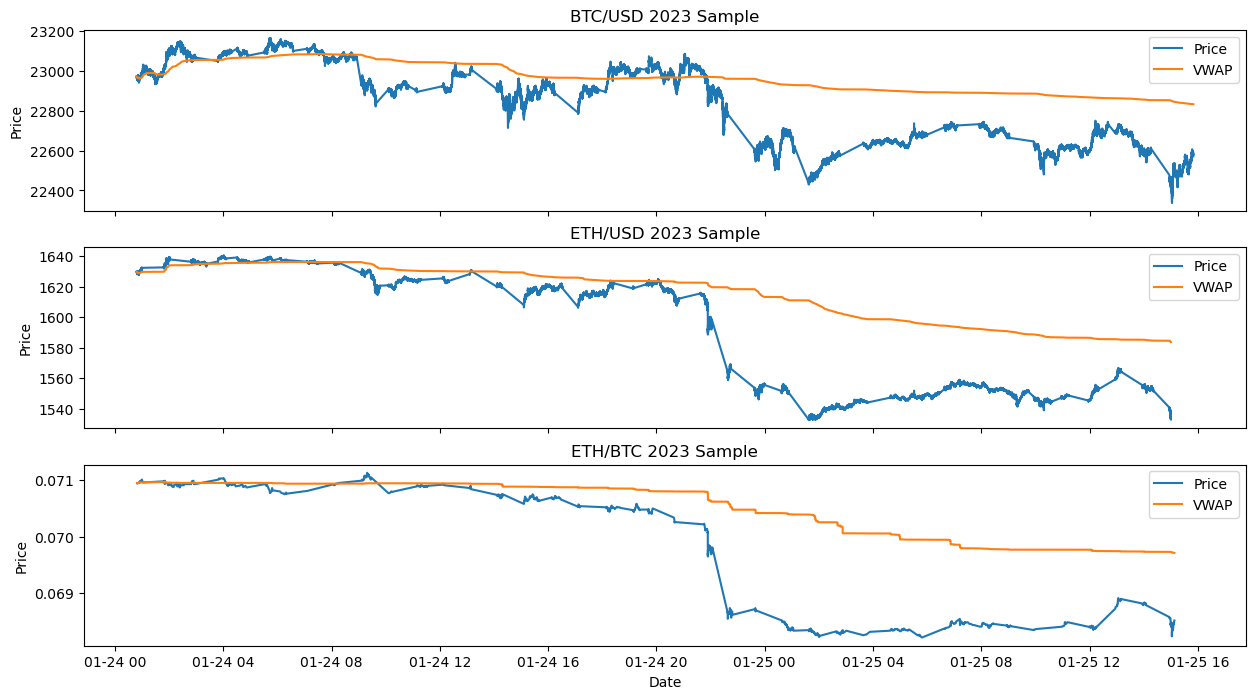

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,8),sharex=True)
ax1.plot(BTC_USD_2023['timestamp_utc_nanoseconds'],BTC_USD_2023['PriceMillionths'],label='Price')
ax1.plot(calc_vwap(BTC_USD_2023),label='VWAP')
ax1.set_title('BTC/USD 2023 Sample')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(ETH_USD_2023['timestamp_utc_nanoseconds'],ETH_USD_2023['PriceMillionths'],label='Price')
ax2.plot(calc_vwap(ETH_USD_2023),label='VWAP')
ax2.set_title('ETH/USD 2023 Sample')
ax2.set_ylabel('Price')
ax2.legend()

ax3.plot(ETH_BTC_2023['timestamp_utc_nanoseconds'],ETH_BTC_2023['PriceMillionths'],label='Price')
ax3.plot(calc_vwap(ETH_BTC_2023),label='VWAP')
ax3.set_title('ETH/BTC 2023 Sample')
ax3.set_ylabel('Price')
ax3.legend()

ax3.set_xlabel('Date')

We notice that this graph is a lot *less clean* than the previous graphs. The sample size for the 2023 sample is much smaller than the other years which can explain this behavior. We see that the price moves are a lot less smooth. We will see this effect later on when examining accumulation opportunities. We also see periods where the moves are linear. From earlier, we remember that there are gaps in trades which explains this. We see that the ETH/BTC trades are a lot more infrequent as we see a lot of moments where smooth lines are connecting the points, indicating discontinuities in trades.

***

## 3 Accumulation

We want to simulate the accumulation of a position. In this section, we will write an algorithm that takes a target quantity $Q$, start time $\tau$, and target participation rate $p$, and simulates the possible accumulation for either buying or selling cryptocurrency pairs. The accumulation will be simulated by using past data. In other words, we will use trades that have previously occurred to calculate how long it will take to accumulate our position. We will make the conservative assumption that when there are a flurry of trades within some time period (i.e 0.1 seconds), we will take the worst price for participation. In other words, if we are looking to accumulate long positions, we will buy $p * \text{Total Volume}$ at the worst price possible. We will also assume transaction fees (0.5% for Crypto/USD pairs and 0.1% for Crypto/Crypto pairs). We will first define constants and create our function to simulate accumulation.

***

**3.1 Constants and Helper Functions**

We will define the constants and functions `accumulate` and `analyze` that will assist in our simulation of accumulation. The specifics are detailed below. `accumulate` will simulate the accumulation of a position while `analyze` will look into the statistics of our accumulation.

In [20]:
THRESHOLD = 100 # Threshold for flurry of trades in nanoseconds 
CRYPTO_TRAD_FEE = 0.5 / 100 # Crypto / USD Transaction Fee 
CRYPTO_CRYPTO_FEE = 0.1 / 100 # Crypto / Crypto Transaction Fee

In [71]:
def accumulate(pair,tau,side,amount,p):
    '''
    Simulates an accumulation of a cryptocurrency given parameters 

    Parameters:
        pair (string): The pair for which accumulation is simulated 
        tau (string): The start / arrival time 
        side (int): Long or short accumulation (1 or -1)
        amount (float): The amount of the pair to accumulate
        p (float): Participation rate 

    Returns:
        trades (DataFrame): DataFrame consisting of time of trades, quantity, price, and transaction fees
    '''
    data = pair[(pair['timestamp_utc_nanoseconds'] >= tau) & (np.sign(pair['Side']) == np.sign(side))]
    data['group'] = ((data['timestamp_utc_nanoseconds'] - data['timestamp_utc_nanoseconds'].shift(1)) > pd.Timedelta(milliseconds=THRESHOLD)).cumsum()
    amt_remaining = amount 
    trades = pd.DataFrame(columns=['Time','Amount','Price','Fee'])
    n_trade = 0 
    time = None 
    
    if 'USD' in pair.index.name:
        fee = CRYPTO_TRAD_FEE 
    else:
        fee = CRYPTO_CRYPTO_FEE

    for name, block in data.groupby('group'):
        vol = block['SizeBillionths'].sum()
        
        if np.sign(side) == 1:
            price = block['PriceMillionths'].max()
            idx = block['PriceMillionths'].idxmax()
        else:
            price = block['PriceMillionths'].min()
            idx= block['PriceMillionths'].idxmin()

        time = block.loc[idx, 'timestamp_utc_nanoseconds']
        max_quantity = p * vol 
        if max_quantity > amt_remaining:
            trades.loc[n_trade] = [time, amt_remaining, price, fee*price*amt_remaining]
            amt_remaining = 0 
        else:
            trades.loc[n_trade] = [time, max_quantity, price, fee*price*max_quantity]
            amt_remaining = amt_remaining - max_quantity

        n_trade += 1 
        if amt_remaining == 0:
            if np.sign(side) == -1:
                trades['Amount'] = trades['Amount'] * -1
            break 

    if time != None:
        data_all_vol = pair[(pair['timestamp_utc_nanoseconds'] >= tau) & (pair['timestamp_utc_nanoseconds'] <= time)]
        book_vwap = calc_vwap(data_all_vol).rename(columns={'VWAP':'Book VWAP'})
    else:
        book_vwap = None

    trades['Simulated VWAP'] = (trades['Amount'] * trades['Price']).cumsum() / trades['Amount'].cumsum()
    trades.index = trades['Time']
    trades = trades.drop(columns=['Time'])

    return trades, book_vwap 

In [53]:
def analyze(trades,book_vwap=None):
    '''
    Analyzes the trades from a accumulation simulation and outputs certain results 

    Parameters:
        trades (DataFrame): DataFrame giving trade information
        book_vwap (DataFrame): DataFrame showing the book VWAP for the timeframe (default None)

    Returns:
        res (DataFrame): DataFrame showing the results of the simulation (i.e total time, simulated VWAP, etc)
    '''

    sim_vwap = trades.iloc[-1]['Simulated VWAP']
    book_vwap = book_vwap.iloc[-1]['Book VWAP']

    arrival_time = trades.index[0]
    end_time = trades.index[-1]
    elapsed_time = (end_time - arrival_time).total_seconds() / 60

    arrival_price = trades.iloc[0]['Price']
    notional = (trades['Amount'] * trades['Price']).sum()
    fees = trades['Fee'].sum()

    res = pd.DataFrame(index=['Trade Results'],columns=['Total Time (Minutes)','Amount','Notional','Notional/Minute','Arrival Price','Simulated VWAP','Book VWAP','Total Fees','Total Trades'])
    if elapsed_time == 0:
        res.loc['Trade Results'] = np.nan 
    else:
        res.loc['Trade Results'] = [elapsed_time, trades['Amount'].sum(),round(notional,2), round(notional/elapsed_time), round(arrival_price,2), round(sim_vwap,2), round(book_vwap,2), round(fees,2), trades.shape[0]]
    return res

Now that we have our function defined, we will now show the usage of this function for a single simulation of BTC accumulation.

***

**3.2 Function Showcase**

We will first show how these fucntinos work with a sample example. We will use the BTC/USD pair from 2021-04-10 and set our arrival time to the first available time in our sample. We will try to accumulate 1 BTC (a long position) in this simulation. We will also assume a participation rate of 5%.

In [23]:
accumulation, book_vwap = accumulate(BTC_USD_2021,'2021-04-10 21:28:52.515484',1,1,0.05)
accumulation

,Amount,Price,Fee,Simulated VWAP
Time,,,,
2021-04-10 21:28:53.470961,0.00118,"59,122.08000",0.34926,"59,122.08000"
2021-04-10 21:28:54.064537,0.00003,"59,119.96000",0.00821,"59,122.03130"
2021-04-10 21:28:54.835128,0.00140,"59,123.81000",0.41316,"59,122.98490"
2021-04-10 21:28:55.030223,0.00001,"59,123.81000",0.00349,"59,122.98861"
2021-04-10 21:28:55.577343,0.00423,"59,123.81000",1.24956,"59,123.49579"
...,...,...,...,...
2021-04-10 21:34:09.314968,0.00056,"59,210.74000",0.16657,"59,126.49148"
2021-04-10 21:34:09.718861,0.00040,"59,210.73000",0.11962,"59,126.52652"
2021-04-10 21:34:11.397322,0.00005,"59,206.55000",0.01617,"59,126.53102"


Here, we obtain a DataFrame with the timestamps of every trade, the amounts of each trade, the price, fees, and our simulated VWAP. Let's plot our trades to better gauge the accumulation and look at a visual.

Text(0.5, 1.0, 'Size of BTC/USD accumulation on 4/10/21')

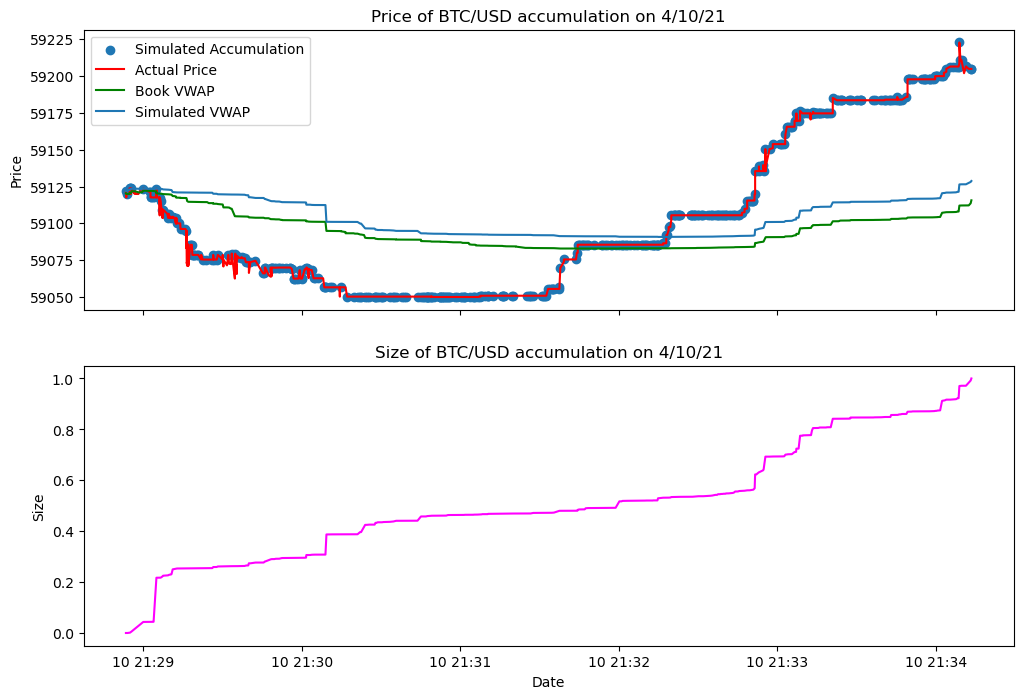

In [24]:
BTC_USD_interval = BTC_USD_2021[(BTC_USD_2021['timestamp_utc_nanoseconds'] >= accumulation.index[0]) & (BTC_USD_2021['timestamp_utc_nanoseconds'] <= accumulation.index[-1])]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,8),sharex=True)

ax1.scatter(accumulation.index,accumulation['Price'],label='Simulated Accumulation')
ax1.plot(BTC_USD_interval['timestamp_utc_nanoseconds'],BTC_USD_interval['PriceMillionths'],label='Actual Price',color='red')
ax1.plot(calc_vwap(BTC_USD_interval),label='Book VWAP',color='green')
ax1.plot(accumulation['Simulated VWAP'],label='Simulated VWAP')
ax1.legend()

ax1.set_ylabel('Price')
ax1.set_title('Price of BTC/USD accumulation on 4/10/21')

ax2.plot(accumulation['Amount'].cumsum(),color='magenta')
ax2.set_ylabel('Size')
ax2.set_xlabel('Date')
ax2.set_title('Size of BTC/USD accumulation on 4/10/21')

Here, I plotted the simulated accumulation with blue dots. This is due to the simulated accumulation being discrete and only occurring at certain times. The actual time is plotted as a continuous line as we approximate the tradebook as a continuous series of prices. However, this is not exactly the case as there may be multiple trades at different prices at the same time - though this approximation should be close and is done for convenience. We then plot our simulated and book VWAP. The book VWAP is calculated with every trade in the book while our simulated VWAP is calculated only with the trades that we pursue. We see that our simulated VWAP is higher than the book VWAP, which is not ideal as we are trying to accumulate a long position. However, we see that the price first drops before rising. Since our position isn't filled completely, we are still accumulating positions as the price is rising, explaining this discrepency. If the price was falling as we were accumulating, we would see our simulated VWAP to be lower than the book VWAP.

We also see a plot of the size of our accumulation over time. We see that there are moments where we accumulate big positions in a single trade. This can be explained by there being big trades in the book history. Since we are replicating our accumulation with the book history, whenever there is a large trade in the history, we will also have a larger trade (multiplied by some participation rate).

In [25]:
analyze(accumulation,book_vwap)

,Total Time (Minutes),Amount,Notional,Notional/Minute,Arrival Price,Simulated VWAP,Book VWAP,Total Fees,Total Trades
Trade Results,5.33300,1.00000,"59,128.77000",11087,"59,122.08000","59,128.77000","59,115.66000",295.64000,425


We see that the price we first built our position on was at 59,122.08. However, our VWAP was at 59,128.77, indicating that we accumulated a position at a worst price than desired. The explanation is mentioned above. The price is increasing as we are trying to accumulate a long position. We also see that we had $295.64$ in total fees. This fee amount will always be our $\text{Fee Percentage} * \text{Notional}$. The fee percentage will differ depending on if the pair is between two cryptocurrencies or a cryptocurrency and USD. We also see that to accumulate this position, we made 425 trades in 5.33 minutes to accumulate 1 BTC. 

Now that we have shown an example of accumulation, we will now do some deeper analysis on the accumulation of cryptocurrencices in these time periods.

***

## 4 Analysis

We will now look more closely into accumulation opportunities of these cryptomarkets throughout the three years. First, we will define the positions and times we will use for our analysis.

**4.1 Position Definitions**

Since we are dealing with three different pairs in three different years, we should make certain things consistent across in order to make accurate comparisons. For example, there is no reason to believe that the market capitalizations of the three pairs are the same and thus there is no reason to believe that a large position in one market is the same as a large position in another market. To be consistent, we will consider a large position to be $\text{20x the 75th percentile trade size}$. This allows us to obtain a stable metric for a **large position** in each of these markets.

We will first define our definition of a **large position**:

In [26]:
large_trades = pd.concat([btc_sizes.describe().loc['75%'], eth_sizes.describe().loc['75%'], eth_btc_sizes.describe().loc['75%']]).to_frame('Large Trades')
large_trades = 20 * large_trades
large_trades

,Large Trades
BTC/USD 2021,0.34033
BTC/USD 2022,0.38167
BTC/USD 2023,1.48337
ETH/USD 2021,9.22742
ETH/USD 2022,6.53694
ETH/USD 2023,11.09469
ETH/BTC 2021,5.10094
ETH/BTC 2022,9.66580
ETH/BTC 2023,16.77925


We will proceed with these values to be our definition of a large trade for the remainder of the analysis.

Now, we need to obtain the times that we will simulate our accumulation efforts. We should accumulate our large positions at the same time in all the markets to make comparisons. Thus, we will create lists consisting of the unique times for the samples in 2021, 2022, and 2023. Since we modified the samples such that all samples in a year are approximately the same period, this should give us no issues.

In [27]:
times_2021 = pd.concat([BTC_USD_2021['timestamp_utc_nanoseconds'], ETH_USD_2021['timestamp_utc_nanoseconds'], ETH_BTC_2021['timestamp_utc_nanoseconds']]).unique()
times_2022 = pd.concat([BTC_USD_2022['timestamp_utc_nanoseconds'], ETH_USD_2022['timestamp_utc_nanoseconds'], ETH_BTC_2022['timestamp_utc_nanoseconds']]).unique()
times_2023 = pd.concat([BTC_USD_2023['timestamp_utc_nanoseconds'], ETH_USD_2023['timestamp_utc_nanoseconds'], ETH_BTC_2023['timestamp_utc_nanoseconds']]).unique()

To prevent errors later on, we limit the timesample such that we only use times that are in all the cryptocurrency pairs.

In [84]:
times_2023 = times_2023[times_2023 <= pd.to_datetime('2023-01-25 15:00:30.376266')]

We will use a random seed so that we have the same results everytime we run this simulation. If this seed is changed, the results may differ across simulation runs.

In [85]:
random.seed(69)
sample_2021 = random.sample(list(times_2021),100)
sample_2022 = random.sample(list(times_2022),100)
sample_2023 = random.sample(list(times_2023),100)

Since we are performing these simulations a multitude of times, we will define a function that will simulate accumulations and output some important metrics. These metrics are the elapsed time, accumulation rate, and percent change from arrival price to simulated VWAP. Documentation can be found below for the `simulate` function. 

In [58]:
def simulate(time_index,btcusd,ethusd,ethbtc,year,p=0.05):
    '''
    Simulates long/short accumulations in BTC/USD, ETH/USD, and ETH/BTC at the same times in a given year 

    Parameters:
        time_index (list): List of arrival times at which to start accumulation 
        btcusd (DataFrame): DataFrame of the BTC/USD trade book
        ethusd (DataFrame): DataFrame of the ETH/USD trade book 
        ethbtc (DataFrame): DataFrame of the ETH/BTC trade book 
        year (string): The year of the cryptocurrency samples
        p (float): Participation rate (default 0.05)

    Returns:
        total_times (DataFrame): The total time for accumulation for the different pairs
        accum_rate (DataFrame): Accumulate rates for the different pairs
        pct_change (DataFrame): Percent change from arrival price to VWAP for the different pairs 
    '''
    y = ' ' + year 
    total_times = pd.DataFrame(index=time_index,columns=['BTC/USD Long' + y, 'BTC/USD Short' + y, 'ETH/USD Long' + y, 'ETH/USD Short' + y, 'ETH/BTC Long' + y, 'ETH/BTC Short' + y])
    accum_rate = pd.DataFrame(index=time_index,columns=['BTC/USD Long' + y, 'BTC/USD Short' + y, 'ETH/USD Long' + y, 'ETH/USD Short' + y, 'ETH/BTC Long' + y, 'ETH/BTC Short' + y])
    pct_change = pd.DataFrame(index=time_index,columns=['BTC/USD Long' + y, 'BTC/USD Short' + y, 'ETH/USD Long' + y, 'ETH/USD Short' + y, 'ETH/BTC Long' + y, 'ETH/BTC Short' + y])
    
    for t in time_index:
        btc_l, btc_vwap_l = accumulate(btcusd,t,1,large_trades.loc['BTC/USD' + y].item(),p)
        eth_l, eth_vwap_l = accumulate(ethusd,t,1,large_trades.loc['ETH/USD' + y].item(),p)
        eth_btc_l, eth_btc_vwap_l = accumulate(ethbtc,t,1,large_trades.loc['ETH/BTC' + y].item(),p)

        btc_trades_l = analyze(btc_l, btc_vwap_l)
        eth_trades_l = analyze(eth_l, eth_vwap_l)
        eth_btc_trades_l = analyze(eth_btc_l, eth_btc_vwap_l)

        btc_s, btc_vwap_s = accumulate(btcusd,t,-1,large_trades.loc['BTC/USD' + y].item(),p)
        eth_s, eth_vwap_s = accumulate(ethusd,t,-1,large_trades.loc['ETH/USD' + y].item(),p)
        eth_btc_s, eth_btc_vwap_s = accumulate(ethbtc,t,-1,large_trades.loc['ETH/BTC' + y].item(),p)

        btc_trades_s = analyze(btc_s, btc_vwap_s)
        eth_trades_s = analyze(eth_s, eth_vwap_s)
        eth_btc_trades_s = analyze(eth_btc_s, eth_btc_vwap_s)        

        total_times.loc[t] = [btc_trades_l['Total Time (Minutes)'].item(), btc_trades_s['Total Time (Minutes)'].item(), eth_trades_l['Total Time (Minutes)'].item(), eth_trades_s['Total Time (Minutes)'].item(), eth_btc_trades_l['Total Time (Minutes)'].item(), eth_btc_trades_s['Total Time (Minutes)'].item()]
        accum_rate.loc[t] = [btc_trades_l['Notional/Minute'].item(), btc_trades_s['Notional/Minute'].item(), eth_trades_l['Notional/Minute'].item(), eth_trades_s['Notional/Minute'].item(), eth_btc_trades_l['Notional/Minute'].item(), eth_btc_trades_s['Notional/Minute'].item()]
        pct_change.loc[t] = [(btc_trades_l['Simulated VWAP'] - btc_trades_l['Arrival Price']).item() / btc_trades_l['Arrival Price'].item(),(btc_trades_s['Simulated VWAP'] - btc_trades_s['Arrival Price']).item() / btc_trades_s['Arrival Price'].item(),(eth_trades_l['Simulated VWAP'] - eth_trades_l['Arrival Price']).item() / eth_trades_l['Arrival Price'].item(),(eth_trades_s['Simulated VWAP'] - eth_trades_s['Arrival Price']).item() / eth_trades_s['Arrival Price'].item(),(eth_btc_trades_l['Simulated VWAP'] - eth_btc_trades_l['Arrival Price']).item() / eth_btc_trades_l['Arrival Price'].item(),(eth_btc_trades_s['Simulated VWAP'] - eth_btc_trades_s['Arrival Price']).item() / eth_btc_trades_s['Arrival Price'].item()]
    
    total_times.loc['Average'] = total_times.mean()
    accum_rate.loc['Mean'] = accum_rate.mean()
    pct_change.loc['Average'] = pct_change.mean()
    pct_change = pct_change * 100
    return total_times, accum_rate, pct_change

Now, let's start by simulating accumulation opportunities in 2021.

***

**4.1 Accumulation in 2021**

Let's first look at the time it takes to accumulate a large position. As mentioned earlier, a large position is defined to be 20x the 75th percentile. We will simulate 100 different accumulations for the same quantity to better gauge the statistics.

In [59]:
total_times_2021, accum_rate_2021, pct_change_2021 = simulate(sample_2021,BTC_USD_2021,ETH_USD_2021,ETH_BTC_2021,'2021',0.05)
total_times_2021

,BTC/USD Long 2021,BTC/USD Short 2021,ETH/USD Long 2021,ETH/USD Short 2021,ETH/BTC Long 2021,ETH/BTC Short 2021
2021-04-11 02:20:57.653165,2.18999,0.10259,4.74164,4.31499,35.17540,23.50335
2021-04-11 15:11:38.058064,3.21360,9.47763,1.10228,6.57315,26.31030,30.91711
2021-04-12 01:01:27.306380,5.62280,1.36975,4.55789,7.39628,12.08135,46.29435
2021-04-11 07:38:44.000725,4.48428,2.24808,15.68753,15.80549,54.59850,133.30898
2021-04-11 02:29:56.628160,5.39625,2.62276,4.45820,5.32119,32.35557,33.54901
...,...,...,...,...,...,...
2021-04-11 22:59:31.479267,5.19971,4.79821,6.83707,21.99432,30.55308,37.12667
2021-04-11 05:47:44.234041,3.60620,7.29731,7.14465,4.22323,29.63898,57.96347
2021-04-12 18:42:50.959010,1.51958,5.87362,2.61425,8.36270,22.65330,27.22454
2021-04-11 18:03:17.005799,4.89135,3.31166,8.64246,19.91317,22.67278,23.66999


We see that it takes longer to accumulate short positions than long positions in all the samples. We also see that it's quickest to accumulate positions in BTC/USD, followed by ETH/USD, and then ETH/BTC. This makes sense as BTC is the most popular cryptocurrency. It's also not surprising to see that ETH/BTC has the longest amount of time. The pair isn't very liquid as many people buy BTC or ETH with USD rather than converting it from one currency to another.

In [60]:
accum_rate_2021

,BTC/USD Long 2021,BTC/USD Short 2021,ETH/USD Long 2021,ETH/USD Short 2021,ETH/BTC Long 2021,ETH/BTC Short 2021
2021-04-11 02:20:57.653165,9370,-199927,4174,-4589,0,0
2021-04-11 15:11:38.058064,6321,-2143,17986,-3014,0,0
2021-04-12 01:01:27.306380,3621,-14862,4331,-2669,0,0
2021-04-11 07:38:44.000725,4524,-9013,1252,-1242,0,0
2021-04-11 02:29:56.628160,3805,-7829,4443,-3722,0,0
...,...,...,...,...,...,...
2021-04-11 22:59:31.479267,3927,-4256,2894,-899,0,0
2021-04-11 05:47:44.234041,5640,-2788,2747,-4644,0,0
2021-04-12 18:42:50.959010,13415,-3472,7532,-2355,0,0
2021-04-11 18:03:17.005799,4163,-6150,2292,-995,0,0


Here, we see the mean accumulation rates. We see the accumulation rate making sense in the context of the accumulation times. For example, if the accumulation time is short, we would expect the rate to be high (which is what we see). It should be noted that comparisons between different pairs shouldn't be made as the notional is different for both. It's interesting to see that ETH/BTC has a rate of 0. This is not because it is actually 0, but that the pair price is already so small, that dividing it by large accumulation results make it equal to 0.

In [61]:
pct_change_2021

,BTC/USD Long 2021,BTC/USD Short 2021,ETH/USD Long 2021,ETH/USD Short 2021,ETH/BTC Long 2021,ETH/BTC Short 2021
2021-04-11 02:20:57.653165,0.03700,0.00259,0.02518,0.03496,0.00000,0.00000
2021-04-11 15:11:38.058064,0.06547,0.04791,0.06893,0.00652,0.00000,0.00000
2021-04-12 01:01:27.306380,-0.00560,-0.01957,0.00701,-0.00421,0.00000,0.00000
2021-04-11 07:38:44.000725,0.02737,-0.12313,0.12704,-0.01692,0.00000,0.00000
2021-04-11 02:29:56.628160,-0.03367,-0.00918,-0.06982,-0.08006,0.00000,0.00000
...,...,...,...,...,...,...
2021-04-11 22:59:31.479267,-0.11328,-0.09802,-0.01166,-0.05130,0.00000,0.00000
2021-04-11 05:47:44.234041,-0.06811,-0.05642,-0.02773,-0.08790,0.00000,0.00000
2021-04-12 18:42:50.959010,0.00529,0.04608,0.04595,0.09425,0.00000,0.00000
2021-04-11 18:03:17.005799,-0.10237,-0.09438,-0.07215,-0.07308,0.00000,0.00000


Here, we see the percentage change from our arrival price to our VWAP. These values are extremely close to 0. We see that the percentage change for long position is -.01% while the percentage change for BTC/USD shorts is almost 0. It is likely that this comes from the current trend of the sample rather than it being an inherent characteristic of the accumulation. If the market is trending upwards, it's likely that you will enter at a worst price if you are trying to enter a long position due to the inherent trend.

***

**4.2 Accumulation in 2022**

We will start with the time to accumulate a position.

In [62]:
total_times_2022, accum_rate_2022, pct_change_2022 = simulate(sample_2022,BTC_USD_2022,ETH_USD_2022,ETH_BTC_2022,'2022',0.05)
total_times_2022 

,BTC/USD Long 2022,BTC/USD Short 2022,ETH/USD Long 2022,ETH/USD Short 2022,ETH/BTC Long 2022,ETH/BTC Short 2022
2022-01-31 03:18:09.306467,2.56185,5.10628,NaN,1.28257,65.11847,44.69108
2022-01-30 08:42:07.921552,2.97939,1.60389,7.52820,13.70388,96.62102,153.06267
2022-02-04 23:30:18.821613,1.13455,2.26479,2.40431,5.28548,28.58710,20.90677
2022-01-30 19:57:02.522946,1.68493,2.20038,3.60525,3.92429,28.29366,28.15239
2022-01-30 06:42:39.891586,6.26293,4.93287,5.75785,7.34779,27.60802,71.85130
...,...,...,...,...,...,...
2022-02-02 15:04:43.250786,1.06216,0.42621,0.90002,0.53340,24.09314,27.66189
2022-01-29 21:35:41.094337,2.18749,1.59394,1.26471,1.21212,59.68907,108.76640
2022-02-04 06:29:07.952252,3.26984,2.76661,1.18164,1.65159,78.92208,91.91670
2022-02-01 17:35:10.979518,0.16904,0.63828,1.05391,1.79287,67.96860,72.61920


We see a similar trend from above. BTC/USD is the most liquid and takes the quickest amount of time to enter a position followed by ETH/USD. ETH/BTC takes the longest and can be attributed to the same liquidity issues: not many people are trading this pair. We also see that it takes longer to accumulate short positions than long positions. Interestingly, we see that the trade times for pairs in 2022 relative to the pairs in 2021 are shorter. This could be attributed to the fact that much of the euphoria for cryptocurrencies occurred around this time. 

In [63]:
accum_rate_2022

,BTC/USD Long 2022,BTC/USD Short 2022,ETH/USD Long 2022,ETH/USD Short 2022,ETH/BTC Long 2022,ETH/BTC Short 2022
2022-01-31 03:18:09.306467,5522,-2768,NaN,-12820,0,0
2022-01-30 08:42:07.921552,4870,-9047,2265,-1244,0,0
2022-02-04 23:30:18.821613,13681,-6860,8045,-3659,0,0
2022-01-30 19:57:02.522946,8499,-6508,4643,-4263,0,0
2022-01-30 06:42:39.891586,2324,-2951,2959,-2317,0,0
...,...,...,...,...,...,...
2022-02-02 15:04:43.250786,13530,-33680,19491,-32859,0,0
2022-01-29 21:35:41.094337,6713,-9215,13551,-14134,0,0
2022-02-04 06:29:07.952252,4435,-5243,15484,-11080,0,0
2022-02-01 17:35:10.979518,87400,-23157,17196,-10112,0,0


We see similar results here that reflect the times to accumulate a position. We see higher accumulation rates for BTC/USD and ETH/USD relative to their 2021 counterparts. However, we see a lower accumulation rate for BTC/USD shorts and a higher accumulation rate for ETH/USD shorts. We see 0% accumulation rates for ETH/BTC, likely due to the illiquidity and small values.

In [56]:
pct_change_2022

,BTC/USD Long 2022,BTC/USD Short 2022,ETH/USD Long 2022,ETH/USD Short 2022,ETH/BTC Long 2022,ETH/BTC Short 2022
2022-01-31 03:18:09.306467,-0.03495,-0.09969,NaN,-0.02226,0.00000,0.00000
2022-01-30 08:42:07.921552,-0.00863,0.00284,0.15397,0.12017,0.00000,0.00000
2022-02-04 23:30:18.821613,0.06230,0.16158,0.22932,0.22798,0.00000,0.00000
2022-01-30 19:57:02.522946,0.01346,-0.00560,0.08755,0.03479,0.00000,0.00000
2022-01-30 06:42:39.891586,0.00168,0.00359,0.01957,-0.05142,0.00000,0.00000
...,...,...,...,...,...,...
2022-02-02 15:04:43.250786,0.05192,-0.05397,0.09549,0.05784,0.00000,0.00000
2022-01-29 21:35:41.094337,-0.12385,-0.10056,-0.12343,-0.15086,0.00000,0.00000
2022-02-04 06:29:07.952252,0.08326,0.09508,0.03681,0.06327,0.00000,0.00000
2022-02-01 17:35:10.979518,0.00747,0.05035,0.10074,0.12889,0.00000,0.00000


Here, we see a slight difference with the 2021 counterparts. The average percent changes are all positive. However, the magnitudes are smiilar to the respective pairs from 2021. It is interesting to see that the percentage change in ETH/USD long positions is much greater than that of the short positions. 

***

**4.3 Accumulation in 2023**

In [86]:
total_times_2023, accum_rate_2023, pct_change_2023 = simulate(sample_2023,BTC_USD_2023,ETH_USD_2023,ETH_BTC_2023,'2023',0.05)
total_times_2023

,BTC/USD Long 2023,BTC/USD Short 2023,ETH/USD Long 2023,ETH/USD Short 2023,ETH/BTC Long 2023,ETH/BTC Short 2023
2023-01-24 01:45:26.349855,3.83402,4.23554,2.39595,2.41314,915.07460,983.92673
2023-01-25 07:15:06.644311,3.96183,5.87735,3.21084,1.71324,472.08219,471.50158
2023-01-25 02:43:23.315297,56.15065,2.09389,3.96199,3.66960,677.84795,743.03981
2023-01-25 14:16:18.241984,1.52139,1.26569,3.02935,1.27914,10.95765,10.41016
2023-01-24 17:48:04.795047,2.88803,19.08983,3.93653,2.13613,650.80730,512.21644
...,...,...,...,...,...,...
2023-01-25 01:52:07.621679,2.59679,3.07286,1.96610,1.79307,610.74481,795.40437
2023-01-24 14:11:46.728641,2.30032,3.39512,1.46742,1.17692,567.30447,700.00347
2023-01-25 01:43:14.460626,2.10910,2.05777,2.10223,0.66617,620.86056,802.82765
2023-01-25 08:12:08.126524,4.00682,6.19435,2.93045,3.72580,415.54887,413.88511


We see that the time to accumulate positions in 2023 has increased from 2022. This can be explained by the cryptocurrency crash and much of the excitement for cryptocurrencies has disappeared. The market isn't as liquid anymore and this can be seen in the time needed to accumulate a position.

In [87]:
accum_rate_2023

,BTC/USD Long 2023,BTC/USD Short 2023,ETH/USD Long 2023,ETH/USD Short 2023,ETH/BTC Long 2023,ETH/BTC Short 2023
2023-01-24 01:45:26.349855,8900,-8056,7564,-7509,0,0
2023-01-25 07:15:06.644311,8508,-5735,5380,-10079,0,0
2023-01-25 02:43:23.315297,597,-15999,4316,-4662,0,0
2023-01-25 14:16:18.241984,21895,-26316,5691,-13480,0,0
2023-01-24 17:48:04.795047,11762,-1779,4551,-8386,0,0
...,...,...,...,...,...,...
2023-01-25 01:52:07.621679,12844,-10853,8660,-9493,0,0
2023-01-24 14:11:46.728641,14783,-10017,12255,-15277,0,0
2023-01-25 01:43:14.460626,15807,-16200,8104,-25563,0,0
2023-01-25 08:12:08.126524,8407,-5436,5883,-4626,0,0


Interestingly enough, we see something different from what we would expect. We see the accumulation rates of the pairs to increase in magnitude relative to 2022. This could potentially be attributed by the fact that our definition of a large position is not the same throughout time periods. The relationship between this and the accumulation rate could lead to this result.

In [88]:
pct_change_2023

,BTC/USD Long 2023,BTC/USD Short 2023,ETH/USD Long 2023,ETH/USD Short 2023,ETH/BTC Long 2023,ETH/BTC Short 2023
2023-01-24 01:45:26.349855,0.06908,0.07257,0.05267,0.04104,0.00000,0.00000
2023-01-25 07:15:06.644311,-0.05129,-0.04685,-0.02825,-0.05779,0.00000,0.00000
2023-01-25 02:43:23.315297,0.02125,-0.02346,-0.10240,-0.07259,0.00000,0.00000
2023-01-25 14:16:18.241984,-0.09147,-0.07107,0.06761,0.07792,0.00000,0.00000
2023-01-24 17:48:04.795047,0.01690,-0.00380,-0.00186,-0.00434,0.00000,0.00000
...,...,...,...,...,...,...
2023-01-25 01:52:07.621679,0.04623,0.04998,0.02085,-0.00912,0.00000,0.00000
2023-01-24 14:11:46.728641,0.07797,0.10059,0.03086,0.03025,0.00000,0.00000
2023-01-25 01:43:14.460626,-0.04087,-0.04043,-0.01237,-0.05144,0.00000,0.00000
2023-01-25 08:12:08.126524,-0.04503,-0.06898,-0.03281,-0.05404,0.00000,0.00000


In terms of percentage change, we see very small differences from arrival price to the VWAP price. We see that for BTC/USD, the price decreases in BTC/USD when trying to sell and increases when trying to buy. However, we shouldn't make conclusions based on such a small sample size. These changes are in line with what we saw for the different pairs in the other years. It's likely that the percentage change is dependent on the current trend of the market at the time. For example, if you are trying to accumulate long positions when the market is going up, you will likely enter at a higher price than the arrival price. On the contrary, if you are trying to accumulate short positions when the market is going down, you'll likely enter at a better price than the arrial price. 

We will now give a visual of the accumulation times.

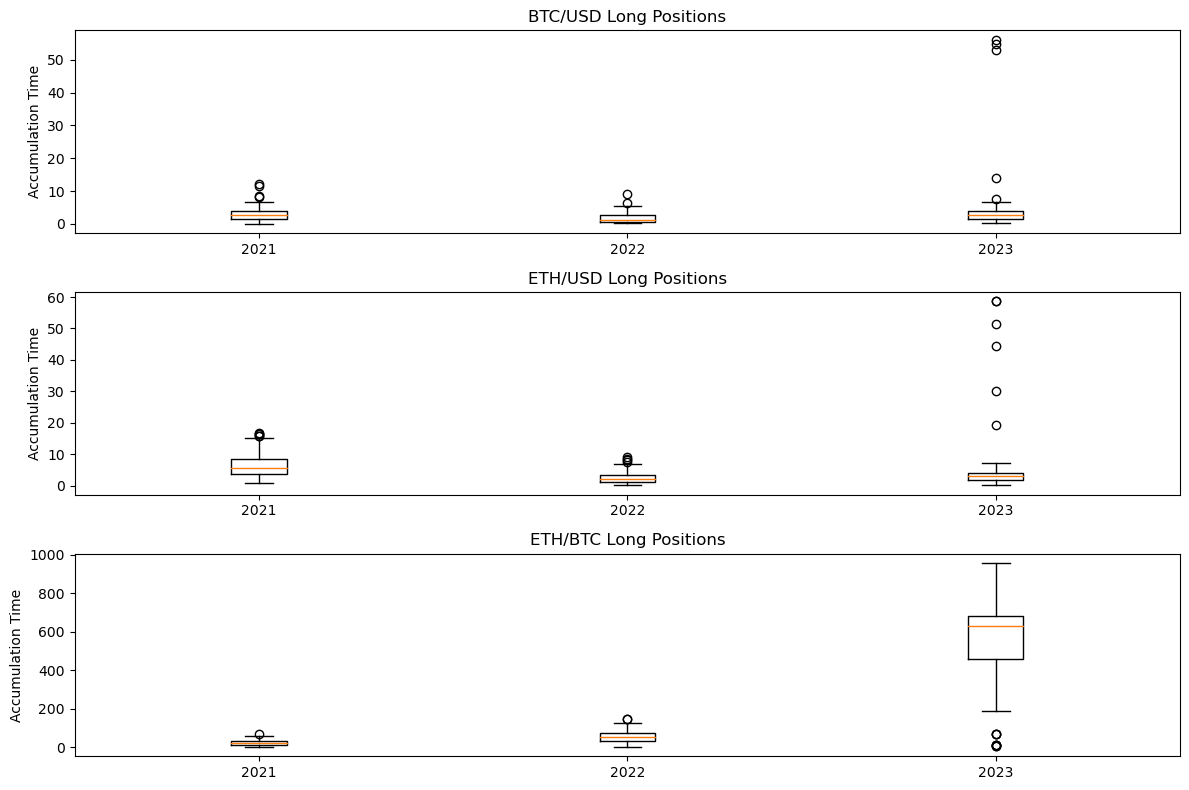

In [151]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8))

ax1.boxplot(total_times_2021[['BTC/USD Long 2021']].iloc[:-1],positions=[0]);
ax1.boxplot(total_times_2022[['BTC/USD Long 2022']].iloc[:-1],positions=[1]);
ax1.boxplot(total_times_2023[['BTC/USD Long 2023']].iloc[:-1],positions=[2]);
ax1.set_title('BTC/USD Long Positions')
ax1.set_ylabel('Accumulation Time')
ax1.set_xticklabels(['2021','2022','2023'])

ax2.boxplot(total_times_2021[['ETH/USD Long 2021']].iloc[:-1],positions=[0]);
ax2.boxplot(total_times_2022[['ETH/USD Long 2022']].iloc[:-1],positions=[1]);
ax2.boxplot(total_times_2023[['ETH/USD Long 2023']].iloc[:-1],positions=[2]);
ax2.set_title('ETH/USD Long Positions')
ax2.set_ylabel('Accumulation Time')
ax2.set_xticklabels(['2021','2022','2023'])

ax3.boxplot(total_times_2021[['ETH/BTC Long 2021']].iloc[:-1],positions=[0]);
ax3.boxplot(total_times_2022[['ETH/BTC Long 2022']].iloc[:-1],positions=[1]);
ax3.boxplot(total_times_2023[['ETH/BTC Long 2023']].iloc[:-1],positions=[2]);
ax3.set_title('ETH/BTC Long Positions')
ax3.set_ylabel('Accumulation Time')
ax3.set_xticklabels(['2021','2022','2023'])

fig.tight_layout()

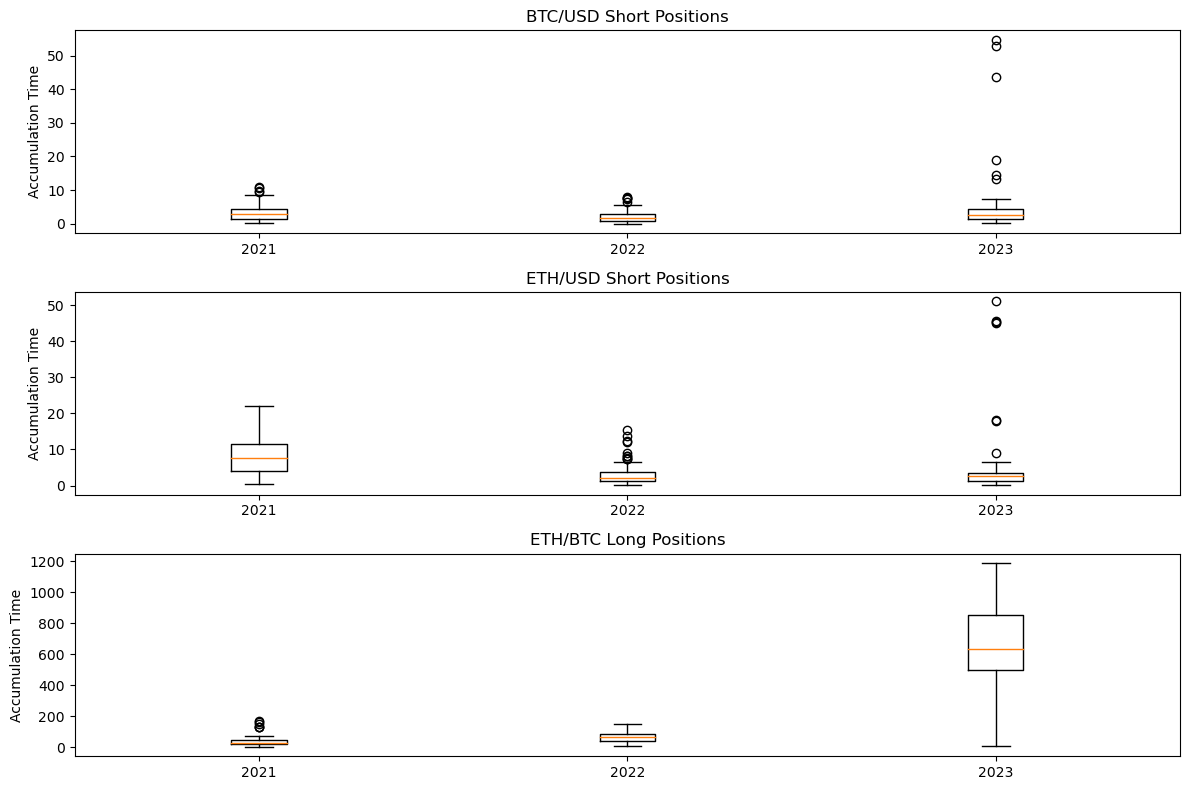

In [152]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8))

ax1.boxplot(total_times_2021[['BTC/USD Short 2021']].iloc[:-1],positions=[0]);
ax1.boxplot(total_times_2022[['BTC/USD Short 2022']].iloc[:-1],positions=[1]);
ax1.boxplot(total_times_2023[['BTC/USD Short 2023']].iloc[:-1],positions=[2]);
ax1.set_title('BTC/USD Short Positions')
ax1.set_ylabel('Accumulation Time')
ax1.set_xticklabels(['2021','2022','2023'])

ax2.boxplot(total_times_2021[['ETH/USD Short 2021']].iloc[:-1],positions=[0]);
ax2.boxplot(total_times_2022[['ETH/USD Short 2022']].iloc[:-1],positions=[1]);
ax2.boxplot(total_times_2023[['ETH/USD Short 2023']].iloc[:-1],positions=[2]);
ax2.set_title('ETH/USD Short Positions')
ax2.set_ylabel('Accumulation Time')
ax2.set_xticklabels(['2021','2022','2023'])

ax3.boxplot(total_times_2021[['ETH/BTC Short 2021']].iloc[:-1],positions=[0]);
ax3.boxplot(total_times_2022[['ETH/BTC Short 2022']].iloc[:-1],positions=[1]);
ax3.boxplot(total_times_2023[['ETH/BTC Short 2023']].iloc[:-1],positions=[2]);
ax3.set_title('ETH/BTC Long Positions')
ax3.set_ylabel('Accumulation Time')
ax3.set_xticklabels(['2021','2022','2023'])

fig.tight_layout()

We can see the comparisons for accumulation times more visual. We see that the accumulation time for BTC/USD is a lot more consistent and quicker in terms of time than the other pairs. We see that 2023 has the most range in terms of accumulation time, potentially due to liquidity issues after the recent cryptocurrency crash. We also see the accumulation time of ETH/BTC is much longer than the other pairs. 

***

# 5 Conclusion

In this assignment, we examined various pairs in the cryptocurrency markets. More specifically, we looked at previous trade data of BTC/USD, ETH/USD, and ETH/BTC in 2021, 2022, and 2023 on the order of nanoseconds. First, we loaded the data and examined it. We saw that all the trade data for a given year was approximately over the same period. However, the BTC/USD pair from 2021 was over 16 days. To make comparisons across different currencies, we cut the BTC/USD trades down so that it was in the same time period as the other pairs during 2021. Next, we examined the number of trades in each of the periods as well as the proportion of buys and sells. We noticed that BTC/USD had the most trades, followed by ETH/USD, and then ETH/BTC in any given time period. This indicates that BTC/USD is the most liquid followed by ETH/USD and then ETH/BTC. This makes sense as BTC is the most popular cryptocurrency and many of the transactions are buying cryptocurrency from USD, rather than converting from one cryptocurrency to another. 

Next, we made a scatter plot showing the trades that were taken. We saw that for the most part, large trade sizes weren't usually correlated. However, there were times where large trades in one cryptocurrency pair were seen with large trades in other cryptocurrency pairs. This was the case for all three pairs. From this plot, we also saw that the data in 2023 had a lot more discontinuities. In other words, there were periods of time (nanoseconds) where there were no trades. This could be attributed to the fact that a lot of the excitement for cryptocurrency has died due to the crash and as a result, the cryptocurrency markets are less liquid.

Afterwards, we looked at the price of the cryptocurrency pairs to examine how they trended in these time periods. We saw that all three pairs were strongly correlated with each other, except for at the end of our 2022  period where we saw ETH/BTC decrease in price while BTC/USD and ETH/USD increase in price. We also plotted VWAP with the prices to see how the pairs traded relative to it. We saw that VWAP is a lot more prone to changes at the beginning compared to the end as price changes are more significant. We saw that VWAP tended to have a near zero slope towards the end of our subsamples, though the timeframe of our subsamples is also over a small time period. Once again, we see the lack of liquidity in the 2023 plots as the price moves around a lot more suddenly. 

We then moved on to simulating our accumulations with a helper function. We provided the function with the pair, year, size to accumulate, side, and participation rate. Participation rate is the percentage of volume that we will take when we enter a trade. We also implemented a system where we would be conservative when taking trades. In other words, if there are a lot of trades that occur in some period (i.e 100ms), we will take the worst price (i.e highest for buying and lowest for selling) and add $p * \text{Total Volume}$ to our position. This function provided us with a DataFrame of trades taken, the volume, and associated price that we could later analyze. 

We showcased this function by using the BTC/USD pair in 2021. We simulated the accumulation of 1 BTC and plotted the results. We see that the we had a volume-weighted average price higher than that of the book. This can be explained by the fact that we were trying to accumulate positions as the price was increasing, explaining the higher simulated VWAP compared to book VWAP. We also saw our accumulation of positions. We accumulated larger positions when our order history had trades with larger positions (though we had only a proportion of their larger positions). We noted that the series of prices is not exact. There can be many trades at the same time, but with different prices. However, we ignored this fact for simplicity. In our analysis, we looked at number of trades, time to accumulation, simulated VWAP, book VWAP, and other factors. We used these factors when we analyzed accumulation throughout the three pairs over the three years.

In order to analyze accumulation across the pairs through different time periods, we had to make a few assumptions. Since we're dealing with *large positions*, we needed to first define a *large position*. Here, we defined a large position to be $20 * \text{75th percentile of sizes}$ for each pair. This allows us to in a sense, standardize across every year and pair. We also assumed a constant participation rate of 0.05 for all our simulations. We also picked 100 random times for the three years. From earlier, we saw that the time period of all three pairs per year was approximately the same and thus we randomly sampled a time. This allows us to *in a sense*, obtain comparable results across different pairs and times (they have different market capitalizations, prices every year... a large trade in ETH isn't necessarily a large trade in BTC). It is good to note that we did limit the maximum time of 2023 in order to ensure that all our samples were valid times. We looked at the time to accumulate a large position, the accumulation rate, and percentage change in arrival price to volume-weighted average price across 100 samples. We saw that in general, the time to accumulate was shortest in 2022, followed by 2021, and then 2023. This can be explained by the excitement of cryptocurrencies in 2021 and 2022 and then the cryptocurrency crash in the rest of 2022. We also saw that for the most part, the accumulation rates is directly related to the time to accumulate a large position. If the time to accumulate is short, then there is likely a larger accumulation rate. However, this isn't true for the samples of 2023. We saw higher rates compared to 2022 but there were longer accumulation times. We also looked at the percentage change from arrival price to average price. However, there was not much of a correlation there. In fact, it's likely more related to the microstructure and the current trend of the market. If you are trying to enter long positions when the market is going up, you will likely enter at a worst position than the arrival price. We also see that the accumulation rate and percentage change of of ETH/BTC is 0. This is likely due to the liquidity issues of ETH/BTC and the fact that the quantities are extremely small. The time to accumulate is already long, so it's a small number divided by a big number, leading to a number near 0. We then plotted the accumulation times to give a better visual of the accumulation process throughout the years.

In the future, it will be good to look at a larger sample size. Here, the intervals of the samples are over a couple days and as a result, the current market conditions will effect the results that we see. For example, if the market is trending upwards during the time period, we may see us getting into long positions at a worst price than when entering. It would be interesting to see how the market reacts throughout the crash and to see how liquidity is affected on days with extremely large ranges (i.e June 2022). In this assignment, we looked at only ETH and BTC and the pair between them. However, it would be interesting to look at smaller altcoins like SOL and see how those are affected. It'd also be good to calculate a more precise time-series of the prices to see any correlation between volume spikes, especially on large range volatile days. If we had more time, we could look at more samples of accumulation events. Currently, we only looked at ten due to computation concerns, though we could get a better idea of accumulation with larger sample sizes over a longer period of time (rather than 1 day).